In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import datetime as dt
import scipy.stats as stats
from sklearn import preprocessing

In [53]:
df = pd.read_csv('household_power_consumption.txt', delimiter= ';',parse_dates=True)

C:\Users\ParsaG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Attribute Information:

1.date: Date in format dd/mm/yyyy 

2.time: time in format hh:mm:ss 

3.global_active_power*: household global minute-averaged active power (in kilowatt) 

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 

5.voltage: minute-averaged voltage (in volt) 

6.global_intensity: household global minute-averaged current intensity (in ampere) 

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


*(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 

# EDA

In [54]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [55]:
df['datetime']=df['Date']+" "+ df['Time']

In [56]:
df['datetime']= df['datetime'].apply(lambda x:dt.datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
datetime                 datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 158.3+ MB


In [58]:
# focusing on year 2009 only
df1 = df.loc[
    (df.datetime.dt.year== 2009), ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3','datetime']
]

In [59]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
1074636,0.484,0.062,247.860,2.200,0.000,0.000,0.0,2009-01-01 00:00:00
1074637,0.484,0.062,247.720,2.200,0.000,0.000,0.0,2009-01-01 00:01:00
1074638,0.482,0.062,247.750,2.200,0.000,0.000,0.0,2009-01-01 00:02:00
1074639,0.482,0.060,247.520,2.200,0.000,0.000,0.0,2009-01-01 00:03:00
1074640,0.482,0.062,246.940,2.200,0.000,0.000,0.0,2009-01-01 00:04:00


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525600 entries, 1074636 to 1600235
Data columns (total 8 columns):
Global_active_power      525600 non-null object
Global_reactive_power    525600 non-null object
Voltage                  525600 non-null object
Global_intensity         525600 non-null object
Sub_metering_1           525600 non-null object
Sub_metering_2           525600 non-null object
Sub_metering_3           521320 non-null float64
datetime                 525600 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 36.1+ MB


In [98]:
df1.Sub_metering_3.describe()

count    521320.000000
mean          6.822712
std           8.571867
min           0.000000
25%           0.000000
50%           1.000000
75%          18.000000
max          31.000000
Name: Sub_metering_3, dtype: float64

In [61]:
df1['Global_active_power'] =pd.to_numeric(df1['Global_active_power'], errors='coerce')
df1['Global_reactive_power'] =pd.to_numeric(df1['Global_reactive_power'], errors='coerce')
df1['Voltage'] =pd.to_numeric(df1['Voltage'], errors='coerce')
df1['Global_intensity'] =pd.to_numeric(df1['Global_intensity'], errors='coerce')
df1['Sub_metering_1'] =pd.to_numeric(df1['Sub_metering_1'], errors='coerce')
df1['Sub_metering_2'] =pd.to_numeric(df1['Sub_metering_2'], errors='coerce')
df1['Sub_metering_3'] =pd.to_numeric(df1['Sub_metering_3'], errors='coerce')

In [62]:
# Focusing on the active powers only
df1_active = df1.loc[
    :,
    ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
]

In [63]:
df1_active.shape

(525600, 4)

In [64]:
df1_active.isnull().sum()

Global_active_power    4280
Sub_metering_1         4280
Sub_metering_2         4280
Sub_metering_3         4280
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


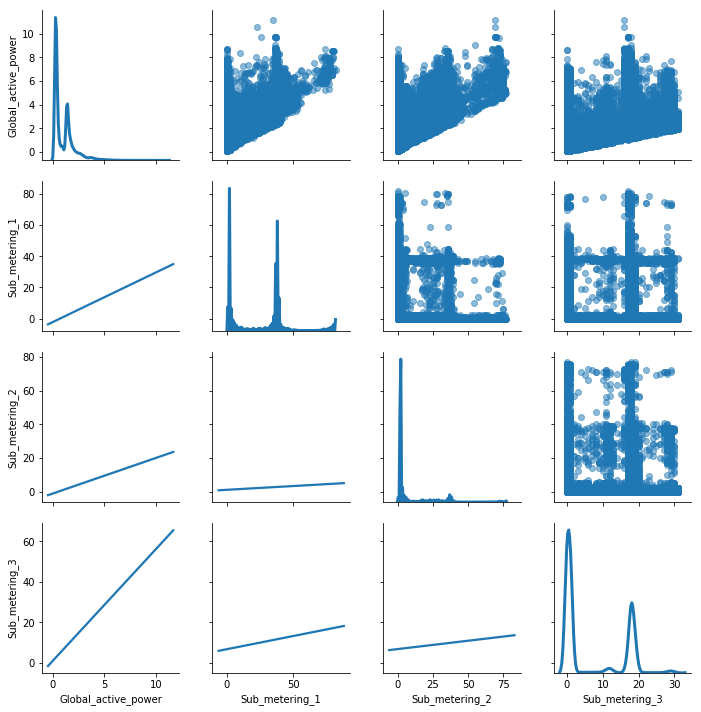

In [65]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df1_active.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [66]:
# Make the correlation matrix.
corrmat = df1_active.corr()
print(corrmat)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.513196        0.402582   
Sub_metering_1                  0.513196        1.000000        0.053011   
Sub_metering_2                  0.402582        0.053011        1.000000   
Sub_metering_3                  0.650515        0.095210        0.050933   

                     Sub_metering_3  
Global_active_power        0.650515  
Sub_metering_1             0.095210  
Sub_metering_2             0.050933  
Sub_metering_3             1.000000  


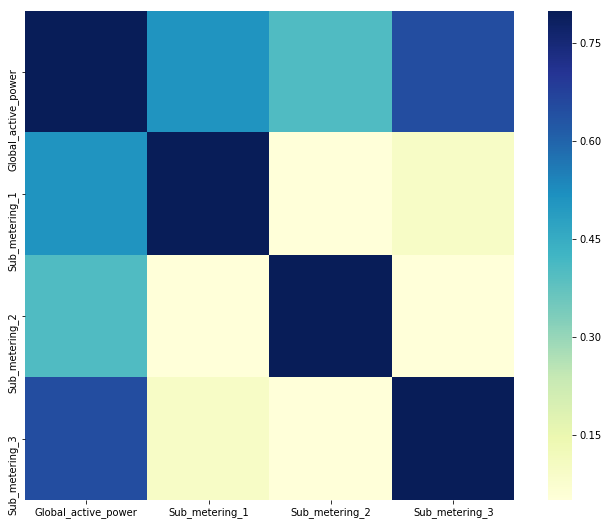

In [67]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat,vmax=0.8, square=True, cmap="YlGnBu")
plt.show()

It appears that Global_active_power, sub_metering_1 and sub_metering_3 are correlated with correlations above .5. The other continuous variables are more weakly correlated and thus less redundant. 

In [68]:
df1['Month']= df1.datetime.dt.month
df1['Day of Week']= df1.datetime.dt.dayofweek
df1['Quarter']= df1.datetime.dt.quarter

In [69]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [70]:
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov', 12:'Dec'}

In [71]:
df1['Day of Week']=df1['Day of Week'].map(dmap)

In [72]:
df1['Month']=df1['Month'].map(mmap)

In [73]:
df1['Quarter']= df1.datetime.dt.quarter

In [78]:
df2_active = df1.loc[(df1['Quarter'] == 1) | (df1['Quarter'] == 2)|(df1['Quarter'] == 3)|(df1['Quarter']==4)
    ,
    ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Quarter']
]

In [79]:
df2_active.head()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Quarter
1074636,0.484,0.0,0.0,0.0,1
1074637,0.484,0.0,0.0,0.0,1
1074638,0.482,0.0,0.0,0.0,1
1074639,0.482,0.0,0.0,0.0,1
1074640,0.482,0.0,0.0,0.0,1


C:\Users\ParsaG\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


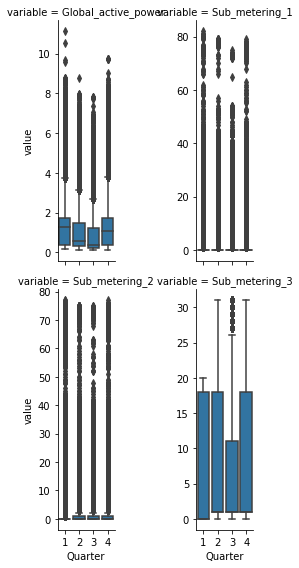

Quarter                                1              2              3  \
Global_active_power count  129533.000000  127729.000000  131582.000000   
                    mean        1.296435       1.002336       0.754628   
                    std         1.123709       0.889256       0.794891   
                    min         0.196000       0.134000       0.122000   
                    25%         0.366000       0.344000       0.244000   
                    50%         1.296000       0.568000       0.354000   
                    75%         1.710000       1.466000       1.218000   
                    max        11.122000       8.760000       7.826000   
Sub_metering_1      count  129533.000000  127729.000000  131582.000000   
                    mean        1.438969       1.013380       0.789249   
                    std         7.085271       5.872620       5.187045   
                    min         0.000000       0.000000       0.000000   
                    25%         0.0000

In [86]:
# Plot all the variables with boxplots for each quarter.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.

df_long = df2_active
df_long = pd.melt(df_long, id_vars=['Quarter'])
g = sns.FacetGrid(df_long, col="variable", size=4, aspect=0.5, col_wrap=2, sharey=False)
g = g.map(sns.boxplot, "Quarter", "value")
g.fig.tight_layout()
plt.show()

# Descriptive statistics by group.
print(df2_active.groupby('Quarter').describe().transpose())

In [88]:
# Test whether group differences are significant.
for col in df2_active.loc[:,'Global_active_power':'Sub_metering_3'].columns:
    print(col)
    print(stats.ttest_ind(
        df2_active[df2_active['Quarter'] == 1][col].dropna(),
        df2_active[df2_active['Quarter'] == 2][col].dropna(),
    ))

Global_active_power
Ttest_indResult(statistic=73.54598748226437, pvalue=0.0)
Sub_metering_1
Ttest_indResult(statistic=16.575159609199687, pvalue=1.1345761048239364e-61)
Sub_metering_2
Ttest_indResult(statistic=12.855738253050365, pvalue=8.203322666581864e-38)
Sub_metering_3
Ttest_indResult(statistic=14.250429263038551, pvalue=4.639245666891308e-46)


## Feature Engineering

#### Working with categorical variables

In [93]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df1['Quarter'])

In [95]:
# Hot weather quarters dummy.
features['hotq'] = np.where((df1['Quarter'].isin([2, 3])), 1, 0)

print(pd.crosstab(features['hotq'], df1['Quarter']))


Quarter       1       2       3       4
hotq                                   
0        129600       0       0  132480
1             0  131040  132480       0


#### Combining two or more highly-correlated variables

In [31]:
corrmat = df1.corr()

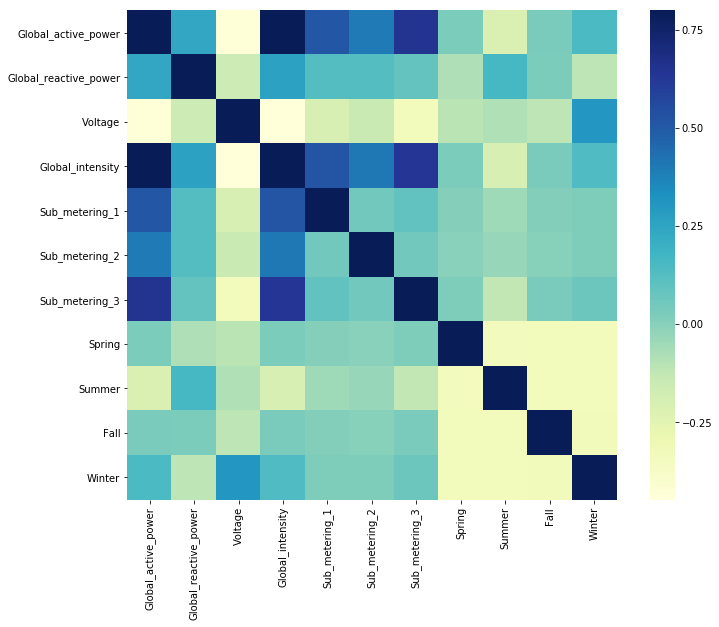

In [32]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.show()


Looks like 'Global_active_power' and 'Global_intensity' are highly redundant with each other. Let's make some averages. Just in case some of the variables are on different scales than others we scale them before averaging by subtracting the average of # each variable from all values in that variable, then dividing by the # standard deviation.

In [96]:
means = df1[['Global_active_power','Global_intensity']].mean(axis=0)
stds = df1[['Global_active_power', 'Global_intensity']].std(axis=0)
features['Ga_Gi'] = ((df1[['Global_active_power', 'Global_intensity']] - means) / stds).mean(axis=1)

In [97]:
# Check how well the composite correlates with each of the individual variables.
plotdf1 = df1.loc[:, ['Global_active_power', 'Global_intensity']]
plotdf1['Ga_Gi'] = features['Ga_Gi'] 
corrmat2 = plotdf1.corr()

print(corrmat2)

                     Global_active_power  Global_intensity     Ga_Gi
Global_active_power             1.000000          0.998843  0.999711
Global_intensity                0.998843          1.000000  0.999711
Ga_Gi                           0.999711          0.999711  1.000000


#### Dealing with non-normality 

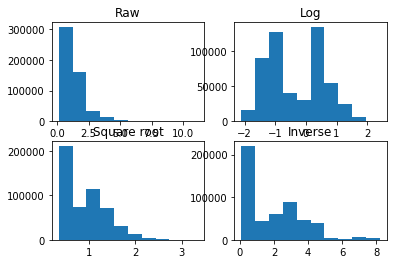

In [35]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df1['Global_active_power'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df1['Global_active_power'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df1['Global_active_power'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df1['Global_active_power'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_Global_active_power'] = np.log(df1['Global_active_power'])

#### Creating linear relationships

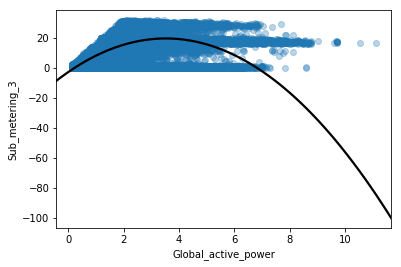

In [36]:
sns.regplot(
    df1['Global_active_power'],
    y=df1['Sub_metering_3'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [37]:
features['Global_active_power_squared'] = df1['Global_active_power'] * df1['Global_active_power']

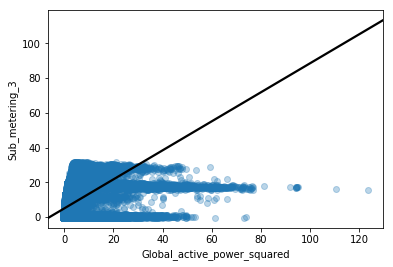

In [38]:
sns.regplot(
    features['Global_active_power_squared'],
    df1['Sub_metering_3'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Global_active_power_squared')
plt.ylabel('Sub_metering_3')
plt.show()

### Standardization

In [39]:
# Select only numeric variables to scale.
df1_num = df1.select_dtypes(include=[np.number]).dropna()

In [40]:
# Save the column names.
names=df1_num.columns

In [41]:
print(names)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [42]:
# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
df1_scaled = pd.DataFrame(preprocessing.scale(df1_num), columns=names)

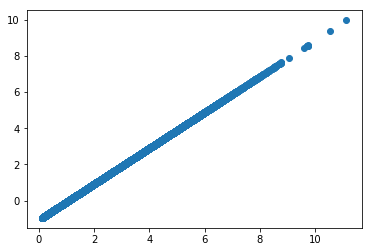

In [43]:
# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df1_num['Global_active_power'], df1_scaled['Global_active_power'])
plt.show()

## PCA

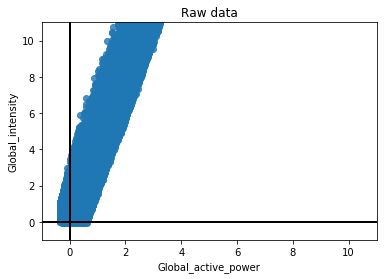

C:\Users\ParsaG\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ParsaG\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


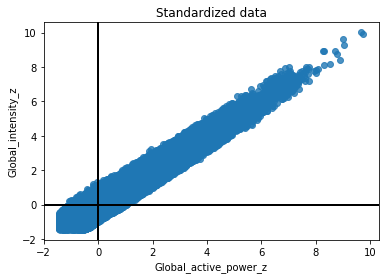

In [99]:
# Take a subset of the data for PCA. This limits to data from 2009

df_pca = df1.dropna()

t = sns.regplot(
    'Global_active_power',
    'Global_intensity',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['Global_active_power_z'] = (df_pca['Global_active_power'] - df_pca['Global_active_power'].mean()) / df_pca['Global_active_power'].std()
df_pca['Global_intensity_z'] = (df_pca['Global_intensity'] - df_pca['Global_intensity'].mean()) / df_pca['Global_intensity'].std()

t = sns.regplot(
    'Global_active_power_z',
    'Global_intensity_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

### Covariance matrix

In [100]:
df_pca = df1_num.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

In [104]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.46772136 0.14393392 0.13317536]
